----------------------------------------------------------------
FATAL AND INJURY COLUMNS
----------------------------------------------------------------
----------------------------------------------------------------

In [2]:
import pandas as pd

df = pd.read_excel('GSAF5.xls')
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,14th October,2025.0,Unprovoked,Columbia,"Bolivar, del Isolate",Catagena Province,Swimming with sharks,Male child,M,14,...,Nurse shark,Kevin McMurray Trackingsharks.com Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,M,14,...,Tiger or Bull shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7th October,2025.0,Unprovoked,Australia,South Australia,Kangaroo Island,Surfing,Lee Berryman,M,50+,...,Bronze whaler?,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29th September,2025.0,Unprovoked,USA,Off California,Catalina Island,Swimming,Christopher Murray,M,54,...,unknown 1.2m shark,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27th September,2025.0,Provoked,Costa Rica,NaN,Cocos Islands,Diving-Tagging sharks,Dr. Mauricio Hoyos,M,48,...,Tiger shark 4m,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Fatal Y/N column cleaning

df['Fatal Y/N'] = df['Fatal Y/N'].astype(str).str.strip().str.upper()

df['Fatal Y/N'] = df['Fatal Y/N'].replace({
    'N ': 'N',
    ' N': 'N',
    'UNKNOWN': 'Unknown',  
    'F': 'Unknown',
    'Y ': 'Y',
    'M': 'Unknown', 
    '2017': 'Unknown',
    'Y x 2': 'Unknown',
    '0': 'Unknown'
})

df.loc[~df['Fatal Y/N'].isin(['Y', 'N']), 'Fatal Y/N'] = 'Unknown'

In [46]:
df['Fatal Y/N'].value_counts(dropna=False)

Fatal Y/N
N          4913
Y          1704
Unknown     433
Name: count, dtype: int64

In [45]:
df['Fatal Y/N'].value_counts()

Fatal Y/N
N          4913
Y          1704
Unknown     433
Name: count, dtype: int64

In [42]:
# Injury column cleaning and classification

df['Injury'] = df['Injury'].fillna('Unknown').astype(str).str.lower().str.strip()


def classify_injury(text):
    text = str(text).lower().strip()
    
    if any(word in text for word in ['no injury', 'uninjured', 'unharmed', 'none']):
        return 'No Injury'
    
    elif any(word in text for word in [
        'fatal', 'died', 'death', 'deceased',
        'human remains', 'drown', 'presumed dead', 'remains of the men'
    ]):
        return 'Fatal Wounds'
    
    elif any(word in text for word in [
        'minor', 'scratch', 'abrasion', 'bruise', 'small', 'superficial',
        'cut', 'scrape', 'nipped', 'grazed', 'bitten but not serious',
        'bumped', 'knocked', 'struck', 'collision', 'impact', 'puncture',
        'non-life-threatening'
    ]):
        return 'Minor Wounds'
    
    elif any(word in text for word in [
        'amputation', 'severe', 'major', 'deep', 'critical', 'multiple',
        'serious', 'massive', 'wound', 'bite', 'bitten', 'injury to',
        'injuries to', 'injured', 'injuries', 'damage', 'torn',
        'arm severed', 'leg severed', 'lacerat', 'tissue loss', 'survived', 'escaped'
    ]):
        return 'Severe Wounds'
    
    else:
        return 'Unknown'

df['Injury_Class'] = df['Injury'].apply(classify_injury)

df['Injury_Class'] = df['Injury_Class'].str.title()


In [43]:
df['Injury_Class'].value_counts()

Injury_Class
Severe Wounds    3264
Fatal Wounds     1621
No Injury         884
Minor Wounds      816
Unknown           465
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


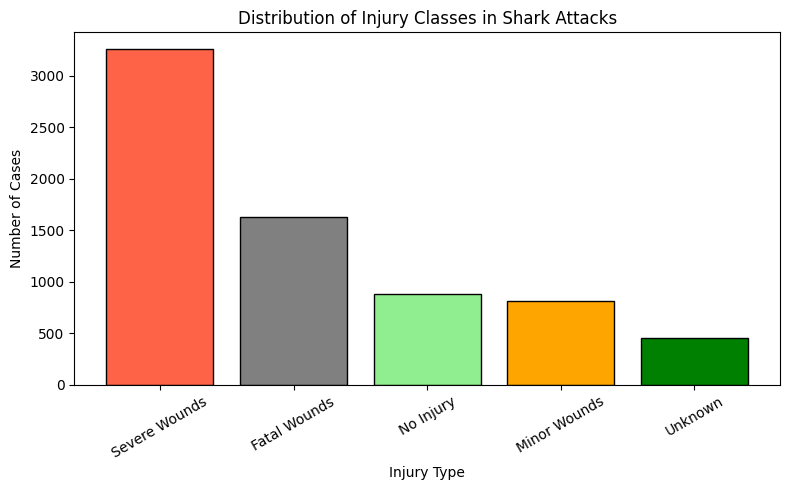

In [41]:
# This shows how many cases fall into each Injury_Class

injury_counts = df['Injury_Class'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(injury_counts.index, injury_counts.values, color=['tomato', 'grey', 'lightgreen', 'orange', 'green', 'blue'], edgecolor='black')
plt.title("Distribution of Injury Classes in Shark Attacks")
plt.xlabel("Injury Type")
plt.ylabel("Number of Cases")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

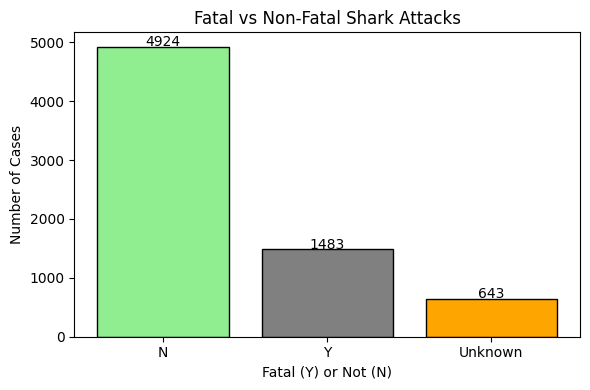

In [15]:
# This shows the distribution of Fatal Y/N

fatal_counts = df['Fatal Y/N'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(fatal_counts.index, fatal_counts.values, color=['lightgreen', 'grey', 'orange'], edgecolor='black')

plt.title("Fatal vs Non-Fatal Shark Attacks")
plt.xlabel("Fatal (Y) or Not (N)")
plt.ylabel("Number of Cases")

for i, value in enumerate(fatal_counts.values):
    plt.text(i, value + 10, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

--------------------------------------
---------------------------------------


Should I match Fatal wounds with Fatal 'Y/N' columns?

In [29]:
# We can see the mismatches here between Fatal Wounds and Fatal Y/N columns:

df[(df['Injury_Class'] == 'Fatal Wounds') & (df['Fatal Y/N'] != 'Y')][['Injury', 'Fatal Y/N']].head(10)

,Injury,Fatal Y/N


In [ ]:
# If Injury says "Fatal Wounds", force Fatal Y/N to "Y"
df.loc[df['Injury_Class'] == 'Fatal Wounds', 'Fatal Y/N'] = 'Y'

# If Fatal Y/N is "Y", force Injury_Class to "Fatal Wounds"
df.loc[df['Fatal Y/N'] == 'Y', 'Injury_Class'] = 'Fatal Wounds'

#The problem with this fix is that it introduces some false data, it merges every fatal
# case to fatal wounds even when the person died from drowning...

In [37]:
# Now every Fatal Injury will allign with Fatal Y/N = 'Y':

df[df['Injury_Class'] == 'Fatal Wounds'][['Injury', 'Fatal Y/N']].sample(20)

,Injury,Fatal Y/N
1912,torso & righ arm bitten fatal,Y
6495,probable drowning & scavenging,Y
6380,fatal,Y
5797,fatal,Y
5631,fatal,Y
3778,probable drowning & scavenging,Y
4411,"disappeared, probable drowning but sharks in a...",Y
1487,cause of death was drowning & preceded shark i...,Y
5944,death may have been due to drowning,Y
5355,fatal,Y
